In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns           # For enhanced plotting
from scipy import stats         # For statistical functions (SciPy)
import statsmodels.api as sm    # For statistical modeling (Statsmodels)

# Load your custom flower dataset
# Make sure 'my_flower_data.csv' is in the same directory as this notebook
df = pd.read_csv('my_flower_data.csv')

# Display the first few rows to confirm it loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset information to confirm cleanliness and data points (I.B.1, I.B.2 proof)
print("\nDataset Info:")
df.info()

print("\nNull values check (should all be 0):")
print(df.isnull().sum())

print(f"\nDataset shape (rows, columns): {df.shape}")
if df.shape[0] >= 100:
    print("Requirement I.B.2 met: Dataset has at least 100 data points.")
else:
    print("WARNING: Dataset has less than 100 data points. Review data generation.")

First 5 rows of the dataset:
   FlowerID    Species   Color  Petal_Count  Height_cm  Bloom_Diameter_cm  \
0         1      Tulip     Red           19      104.6               10.6   
1         2      Daisy     Red           27       55.7                7.1   
2         3  Sunflower   White           15       50.1               10.1   
3         4       Lily  Orange           28      110.8               14.1   
4         5       Rose    Pink           30       10.0                2.0   

   Water_Frequency_Days  Sunlight_Hours_Daily  Fragrance_Intensity  
0                     1                   6.5                    6  
1                     3                   7.3                    5  
2                     3                   7.8                    6  
3                     1                   3.1                    4  
4                     4                   5.7                    7  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data co

In [2]:
# NumPy Operation 1: Calculate the mean (average) height of flowers
mean_height_cm = np.mean(df['Height_cm'])
print(f"The average height of flowers is: {mean_height_cm:.2f} cm") # :.2f formats to 2 decimal places

The average height of flowers is: 71.28 cm


In [3]:
# NumPy Operation 2: Calculate the standard deviation of bloom diameters
std_bloom_diameter = np.std(df['Bloom_Diameter_cm'])
print(f"The standard deviation of bloom diameters is: {std_bloom_diameter:.2f} cm")

The standard deviation of bloom diameters is: 3.26 cm


In [4]:
# NumPy Operation 3: Find the maximum petal count
max_petal_count = np.max(df['Petal_Count'])
print(f"The maximum number of petals found on a flower is: {max_petal_count}")

The maximum number of petals found on a flower is: 44


In [5]:
# NumPy Operation 4: Create a new column 'Height_in_Meters'
# Divide 'Height_cm' by 100 to convert centimeters to meters
df['Height_in_Meters'] = df['Height_cm'] / 100
print("First 5 rows with new 'Height_in_Meters' column:")
print(df[['Height_cm', 'Height_in_Meters']].head())

First 5 rows with new 'Height_in_Meters' column:
   Height_cm  Height_in_Meters
0      104.6             1.046
1       55.7             0.557
2       50.1             0.501
3      110.8             1.108
4       10.0             0.100


In [6]:
# NumPy Operation 5: Count occurrences of each unique value in a specific numerical range
# Let's count how many flowers need watering every 3 days.
water_freq_3_days = np.count_nonzero(df['Water_Frequency_Days'] == 3)
print(f"Number of flowers requiring watering every 3 days: {water_freq_3_days}")

# Alternative NumPy example: Get all unique species and their counts
# unique_species, counts = np.unique(df['Species'], return_counts=True)
# for s, c in zip(unique_species, counts):
#     print(f"Species: {s}, Count: {c}")

Number of flowers requiring watering every 3 days: 38


In [7]:
# SciPy Operation: Perform an Independent Samples T-Test
# Let's compare the 'Height_cm' of 'Rose' flowers vs. 'Tulip' flowers.
# We need to extract the heights for these two species first.

# Filter data for Roses and Tulips
roses_heights = df[df['Species'] == 'Rose']['Height_cm']
tulips_heights = df[df['Species'] == 'Tulip']['Height_cm']

# Ensure there's enough data for both groups (important for real data, less so for synthetic)
if not roses_heights.empty and not tulips_heights.empty:
    # Perform Welch's t-test (which doesn't assume equal variances, safer)
    t_statistic, p_value = stats.ttest_ind(roses_heights, tulips_heights, equal_var=False)

    print("\nSciPy Operation: Independent Samples T-Test (Rose vs. Tulip Height)")
    print(f"T-statistic: {t_statistic:.3f}")
    print(f"P-value: {p_value:.3f}")

    # Interpret the p-value
    alpha = 0.05 # Common significance level
    if p_value < alpha:
        print(f"Conclusion: With a p-value ({p_value:.3f}) less than {alpha}, we reject the null hypothesis.")
        print("There is a statistically significant difference in mean height between Roses and Tulips.")
    else:
        print(f"Conclusion: With a p-value ({p_value:.3f}) greater than {alpha}, we fail to reject the null hypothesis.")
        print("There is no statistically significant difference in mean height observed between Roses and Tulips.")
else:
    print("Not enough data for one or both species to perform T-test.")


SciPy Operation: Independent Samples T-Test (Rose vs. Tulip Height)
T-statistic: 0.221
P-value: 0.825
Conclusion: With a p-value (0.825) greater than 0.05, we fail to reject the null hypothesis.
There is no statistically significant difference in mean height observed between Roses and Tulips.


In [8]:
# Statsmodels Operation: Perform Simple Linear Regression
# We will model 'Bloom_Diameter_cm' as the dependent variable (y)
# and 'Height_cm' as the independent variable (X).
# This directly relates to the correlation we designed into the data.

# Define the dependent variable (y)
y = df['Bloom_Diameter_cm']

# Define the independent variable (X)
# Statsmodels requires a constant (intercept) to be added to the independent variables.
X = sm.add_constant(df['Height_cm'])

# Create and fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X) # OLS stands for Ordinary Least Squares
results = model.fit() # This fits the model to your data

# Print the summary of the regression results
print("\nStatsmodels Operation: Simple Linear Regression (Bloom Diameter vs. Height)")
print(results.summary())


Statsmodels Operation: Simple Linear Regression (Bloom Diameter vs. Height)
                            OLS Regression Results                            
Dep. Variable:      Bloom_Diameter_cm   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     492.0
Date:                Sun, 25 May 2025   Prob (F-statistic):           6.55e-49
Time:                        02:22:49   Log-Likelihood:                -280.16
No. Observations:                 150   AIC:                             564.3
Df Residuals:                     148   BIC:                             570.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [9]:
# Assuming these are already imported and df is loaded from previous steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Make sure your df is loaded:
# df = pd.read_csv('my_flower_data.csv')

C:\Users\synix\AppData\Local\Temp\ipykernel_1368\235495581.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Species', palette='viridis', order=df['Species'].value_counts().index)


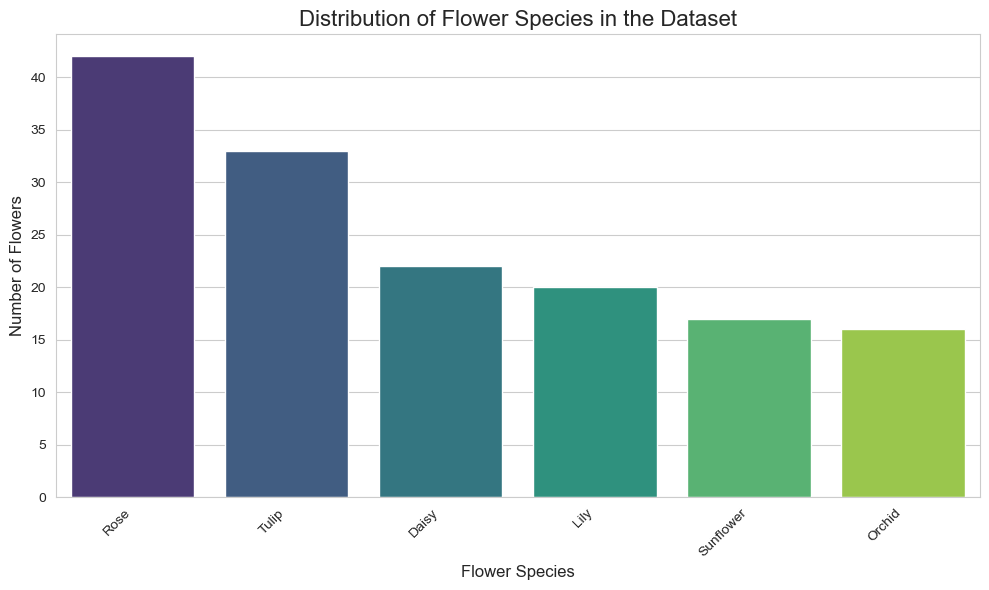

In [10]:
# Set the style for seaborn plots (makes them look nicer)
sns.set_style("whitegrid")

# Create the figure and axes for the plot
plt.figure(figsize=(10, 6)) # Adjusts the size of the plot (width, height)

# Use seaborn's countplot to show the distribution of 'Species'
sns.countplot(data=df, x='Species', palette='viridis', order=df['Species'].value_counts().index)

# Add a title and labels
plt.title('Distribution of Flower Species in the Dataset', fontsize=16)
plt.xlabel('Flower Species', fontsize=12)
plt.ylabel('Number of Flowers', fontsize=12)

# Rotate x-axis labels if they are long
plt.xticks(rotation=45, ha='right') # 'ha' aligns text nicely

# Add a tight layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

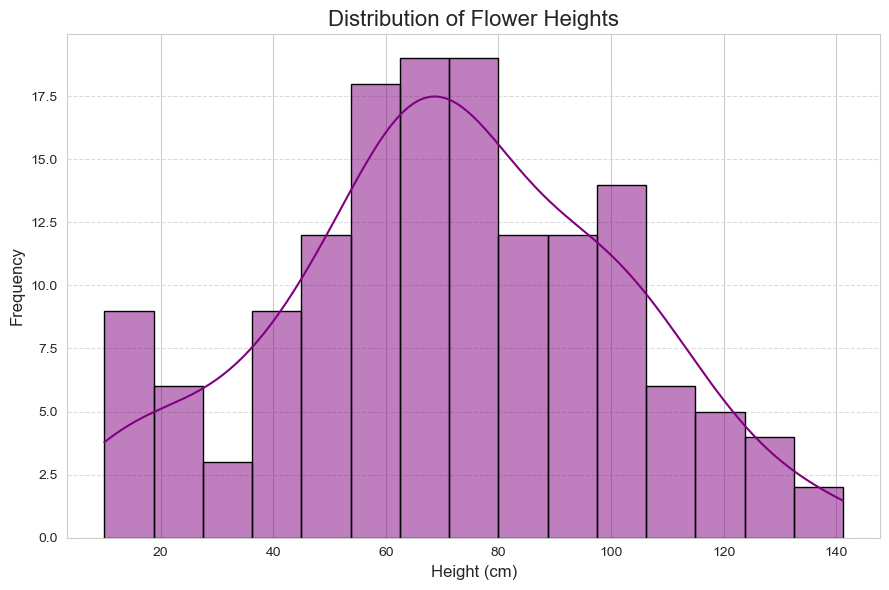

In [11]:
plt.figure(figsize=(9, 6))

# Use seaborn's histplot for a histogram of 'Height_cm'
# 'bins' controls the number of bars, 'kde=True' adds a density curve
sns.histplot(data=df, x='Height_cm', bins=15, kde=True, color='purple', edgecolor='black')

# Add title and labels
plt.title('Distribution of Flower Heights', fontsize=16)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a grid for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

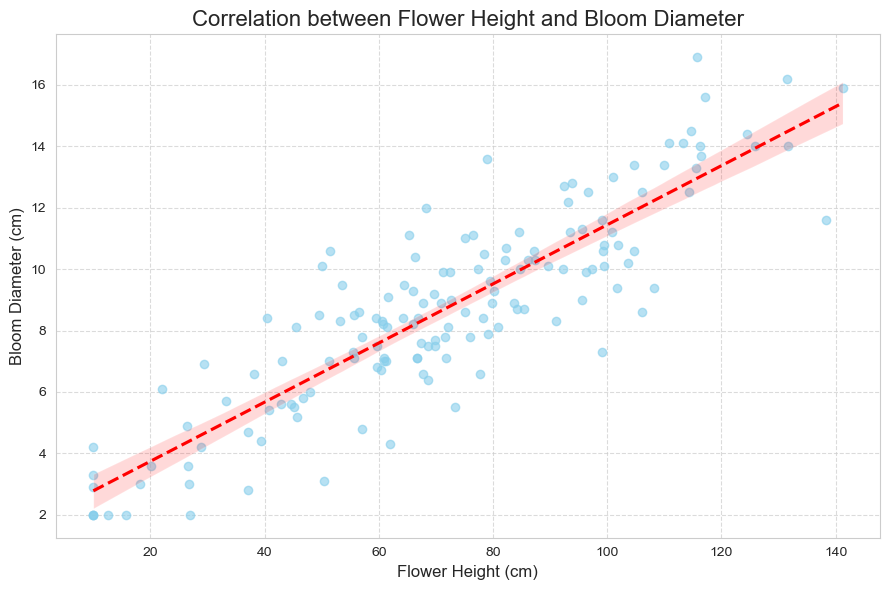

In [12]:
plt.figure(figsize=(9, 6))

# Use seaborn's regplot for a scatter plot with a regression line
# 'scatter_kws' customizes the scatter points, 'line_kws' customizes the regression line
sns.regplot(data=df, x='Height_cm', y='Bloom_Diameter_cm',
            scatter_kws={'alpha': 0.6, 'color': 'skyblue'}, # Transparency and color for points
            line_kws={'color': 'red', 'linestyle': '--'}) # Color and style for regression line

# Add title and labels
plt.title('Correlation between Flower Height and Bloom Diameter', fontsize=16)
plt.xlabel('Flower Height (cm)', fontsize=12)
plt.ylabel('Bloom Diameter (cm)', fontsize=12)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()